In [ ]:
# Replace with the actual file URL from Zenodo
!wget -O test_file.mat "https://zenodo.org/records/15073567/files/BuildingA.zip?download=1"

--2025-10-17 09:50:15--  https://zenodo.org/records/15073567/files/BuildingA.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.185.45.92, 188.185.48.194, 188.185.43.25, ...
Connecting to zenodo.org (zenodo.org)|188.185.45.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7678844964 (7.2G) [application/octet-stream]
Saving to: ‘test_file.mat’

test_file.mat       100%[===================>]   7.15G  1.35MB/s    in 99m 17s 

2025-10-17 11:29:32 (1.23 MB/s) - ‘test_file.mat’ saved [7678844964/7678844964]



In [ ]:
!file /content/test_file.mat
!head -c 100 /content/test_file.mat


/content/test_file.mat: Zip archive data, at least v1.0 to extract, compression method=store
PK
     
xZ              dataset/BuildingA/UT	 $��gZ��gux �& ��  PK
     j�wZ          

In [ ]:
# =====================================
# STEP 1: Import libraries
# =====================================
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# =====================================
# STEP 2: Load MATLAB .mat file (v5 or older)
# =====================================
from scipy.io import loadmat

file_path = "/content/test_file.mat"   # adjust path if needed

data = loadmat(file_path)
print("✅ File loaded successfully!")
print("Available keys:", data.keys())

# =====================================
# STEP 3: Extract features and labels
# =====================================
# 👇 Replace 'features' and 'labels' with the actual keys you see above
X = data['features']
y = data['labels'].ravel()

print(f"✅ Features shape: {X.shape}, Labels shape: {y.shape}")


# =====================================
# STEP 4: Preprocessing (scale + split)
# =====================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)
print("✅ Data split done")

# =====================================
# STEP 5: Model training (Random Forest)
# =====================================
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("✅ Model trained successfully")

# =====================================
# STEP 6: Prediction and evaluation
# =====================================
y_pred = rf.predict(X_test)

print("\n🔹 Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# =====================================
# STEP 7: Feature importance visualization
# =====================================
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,5))
plt.bar(range(len(importances)), importances[indices])
plt.title("Feature Importances")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()

# =====================================
# STEP 8: Save model
# =====================================
joblib.dump(rf, "wifi_occupancy_model.pkl")
print("✅ Model saved as wifi_occupancy_model.pkl")


ValueError: Unknown mat file type, version 97, 99

In [ ]:
import zipfile
import os

file_path = "/content/test_file.mat"
extract_dir = "/content/dataset"

with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("✅ Extracted to:", extract_dir)
print("📂 Files inside:")
for root, dirs, files in os.walk(extract_dir):
    for name in files:
        print(os.path.join(root, name))


✅ Extracted to: /content/dataset
📂 Files inside:
/content/dataset/dataset/BuildingA/stable/004.pkl
/content/dataset/dataset/BuildingA/stable/008.pkl
/content/dataset/dataset/BuildingA/stable/007.pkl
/content/dataset/dataset/BuildingA/stable/006.pkl
/content/dataset/dataset/BuildingA/stable/001.pkl
/content/dataset/dataset/BuildingA/stable/005.pkl
/content/dataset/dataset/BuildingA/stable/009.pkl
/content/dataset/dataset/BuildingA/stable/003.pkl
/content/dataset/dataset/BuildingA/stable/002.pkl
/content/dataset/dataset/BuildingA/stable_office_2Hz5/001.pkl
/content/dataset/dataset/BuildingA/stable_office_2Hz5/003.pkl
/content/dataset/dataset/BuildingA/stable_office_2Hz5/002.pkl
/content/dataset/dataset/BuildingA/stable_corridor_3Hz/004.pkl
/content/dataset/dataset/BuildingA/stable_corridor_3Hz/001.pkl
/content/dataset/dataset/BuildingA/stable_corridor_3Hz/003.pkl
/content/dataset/dataset/BuildingA/stable_corridor_3Hz/002.pkl
/content/dataset/dataset/BuildingA/stable_corridor_2Hz5/004.pkl

✅ Loaded data successfully!
Feature shape: (31, 1000)
Labels shape: (31,)
✅ Data split done
✅ Model training complete

🔹 Accuracy: 57.14 %

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.50      0.33      0.40         3

    accuracy                           0.57         7
   macro avg       0.55      0.54      0.53         7
weighted avg       0.56      0.57      0.55         7



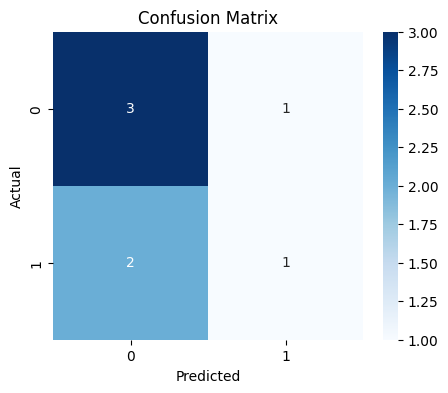

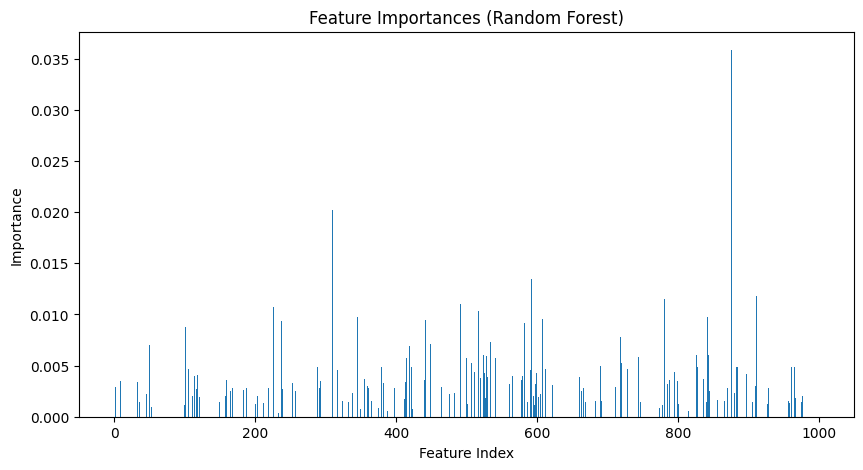

✅ Model saved as wifi_sensing_model.pkl


In [ ]:
# =====================================
# STEP 1: Import Libraries
# =====================================
import os
import pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# =====================================
# STEP 2 (UPDATED): Load .pkl Files Safely
# =====================================
import numpy as np
import pickle
import os

def load_pickles_from_folder(folder_path, label, target_length=1000):
    X_list, y_list = [], []
    for file in os.listdir(folder_path):
        if file.endswith(".pkl"):
            file_path = os.path.join(folder_path, file)
            try:
                with open(file_path, "rb") as f:
                    data = pickle.load(f)

                # Handle dict or array structures
                if isinstance(data, dict):
                    arr = data.get("data") or data.get("csi") or list(data.values())[0]
                else:
                    arr = data

                arr = np.array(arr)
                arr = np.abs(arr).flatten()  # ✅ Convert complex to magnitude

                # Normalize feature length
                if len(arr) > target_length:
                    arr = arr[:target_length]
                elif len(arr) < target_length:
                    arr = np.pad(arr, (0, target_length - len(arr)))

                X_list.append(arr)
                y_list.append(label)
            except Exception as e:
                print(f"⚠️ Skipped {file} ({e})")
    return np.array(X_list), np.array(y_list)



X_active, y_active = load_pickles_from_folder(os.path.join(base_path, "active"), 1)
X_vacant, y_vacant = load_pickles_from_folder(os.path.join(base_path, "vacant"), 0)

X = np.vstack([X_active, X_vacant])
y = np.concatenate([y_active, y_vacant])

print("✅ Loaded data successfully!")
print("Feature shape:", X.shape)
print("Labels shape:", y.shape)


# Load both classes


# =====================================
# STEP 3: Preprocessing
# =====================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
print("✅ Data split done")

# =====================================
# STEP 4: Train Random Forest
# =====================================
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("✅ Model training complete")

# =====================================
# STEP 5: Evaluate Model
# =====================================
y_pred = rf.predict(X_test)
print("\n🔹 Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# =====================================
# STEP 6: Feature Importance
# =====================================
plt.figure(figsize=(10,5))
importances = rf.feature_importances_
plt.bar(range(len(importances)), importances)
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()

# =====================================
# STEP 7: Save Trained Model
# =====================================
import joblib
joblib.dump(rf, "/content/wifi_sensing_model.pkl")
print("✅ Model saved as wifi_sensing_model.pkl")


✅ Loaded data
Features shape: (31, 18) Labels: (31,)
✅ Data split done
✅ Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
🔹 5-Fold CV Accuracy: 74.76% ± 15.18

🔹 Test Accuracy: 75.0 %

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.75      0.75      0.75         4

    accuracy                           0.75         8
   macro avg       0.75      0.75      0.75         8
weighted avg       0.75      0.75      0.75         8



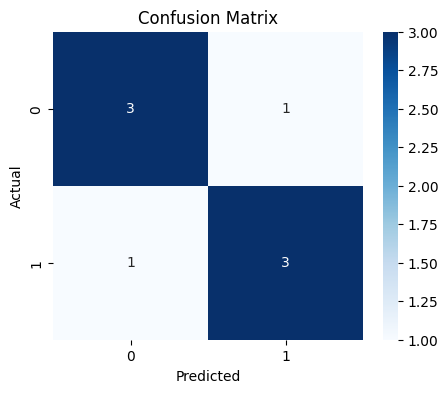

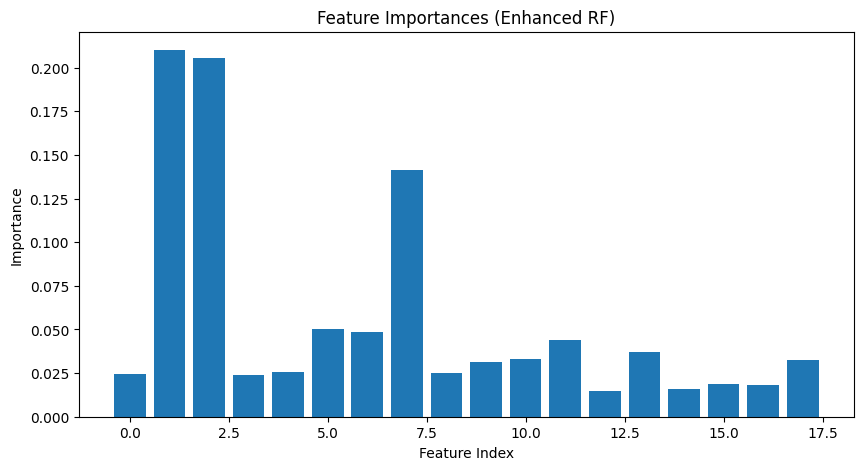

In [ ]:
# =====================================
# STEP 1: Import libraries
# =====================================
import os, pickle, numpy as np, pandas as pd
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# =====================================
# STEP 2: Load & preprocess .pkl files
# =====================================
base_path = "/content/dataset/dataset/BuildingA"

def extract_features(arr):
    """Convert CSI complex array to magnitude-based statistical features."""
    arr = np.abs(np.array(arr)).flatten()
    # Trim/pad
    target_len = 1000
    if len(arr) > target_len:
        arr = arr[:target_len]
    elif len(arr) < target_len:
        arr = np.pad(arr, (0, target_len - len(arr)))
    # Statistical features
    features = [
        np.mean(arr),
        np.std(arr),
        np.var(arr),
        np.median(arr),
        np.min(arr),
        np.max(arr),
        skew(arr),
        kurtosis(arr)
    ]
    # Downsample 10 representative points (signal shape)
    downsample = np.linspace(0, target_len - 1, 10, dtype=int)
    shape_feats = arr[downsample]
    return np.concatenate([features, shape_feats])  # total 18 features

def load_pickles(folder_path, label):
    X, y = [], []
    for file in os.listdir(folder_path):
        if file.endswith(".pkl"):
            with open(os.path.join(folder_path, file), "rb") as f:
                data = pickle.load(f)
            if isinstance(data, dict):
                arr = data.get("data") or data.get("csi") or list(data.values())[0]
            else:
                arr = data
            feats = extract_features(arr)
            X.append(feats)
            y.append(label)
    return np.array(X), np.array(y)

# Load active & vacant samples
X_active, y_active = load_pickles(os.path.join(base_path, "active"), 1)
X_vacant, y_vacant = load_pickles(os.path.join(base_path, "vacant"), 0)

# Combine
X = np.vstack([X_active, X_vacant])
y = np.concatenate([y_active, y_vacant])

print("✅ Loaded data")
print("Features shape:", X.shape, "Labels:", y.shape)

# =====================================
# STEP 3: Scale + Split data
# =====================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42, stratify=y
)
print("✅ Data split done")

# =====================================
# STEP 4: Random Forest with hyperparameter tuning
# =====================================
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("✅ Best Parameters:", grid.best_params_)

# Retrain best model
best_rf = grid.best_estimator_
best_rf.fit(X_train, y_train)

# =====================================
# STEP 5: Cross-validation score
# =====================================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_rf, X_scaled, y, cv=cv, scoring='accuracy')
print(f"🔹 5-Fold CV Accuracy: {cv_scores.mean()*100:.2f}% ± {cv_scores.std()*100:.2f}")

# =====================================
# STEP 6: Evaluate on test set
# =====================================
y_pred = best_rf.predict(X_test)
print("\n🔹 Test Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# =====================================
# STEP 7: Feature importance visualization
# =====================================
importances = best_rf.feature_importances_
plt.figure(figsize=(10,5))
plt.bar(range(len(importances)), importances)
plt.title("Feature Importances (Enhanced RF)")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()


CNN + LSTM CODE

In [ ]:
# =====================================
# STEP 1. Setup & Imports
# =====================================
import os, pickle, numpy as np, tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Input, Conv1D, MaxPooling1D, LSTM,
    Dense, Dropout, BatchNormalization
)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import StandardScaler
import random

# Use GPU if available
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

# =====================================
# STEP 2. Paths & Config
# =====================================
BASE_PATH = "/content/dataset/dataset/BuildingA"
BATCH_SIZE = 32
TARGET_LEN = 1000         # Trim/pad to this length
AUG_PROB = 0.3            # Probability of augmentation
EPOCHS = 60

# =====================================
# STEP 3. Utility: stream .pkl files
# =====================================
def list_samples():
    """List (filepath, label) pairs for active & vacant folders."""
    pairs = []
    for folder, label in [("active", 1), ("vacant", 0)]:
        path = os.path.join(BASE_PATH, folder)
        for f in os.listdir(path):
            if f.endswith(".pkl"):
                pairs.append((os.path.join(path, f), label))
    random.shuffle(pairs)
    return pairs

samples = list_samples()
print(f"Found {len(samples)} pickle files.")

# =====================================
# STEP 4. Feature extractor
# =====================================
def load_and_preprocess(path, label):
    """Load single pickle -> magnitude array -> fixed length."""
    with open(path.decode("utf-8"), "rb") as f:
        data = pickle.load(f)
    if isinstance(data, dict):
        arr = data.get("data") or data.get("csi") or list(data.values())[0]
    else:
        arr = data
    arr = np.abs(np.array(arr)).flatten()

    # Trim/pad
    if len(arr) > TARGET_LEN:
        arr = arr[:TARGET_LEN]
    elif len(arr) < TARGET_LEN:
        arr = np.pad(arr, (0, TARGET_LEN - len(arr)))

    # Optional augmentation
    if np.random.rand() < AUG_PROB:
        noise = np.random.normal(0, 0.02, arr.shape)
        arr = arr * np.random.uniform(0.9, 1.1) + noise

    # Scale to mean=0 std=1
    arr = (arr - np.mean(arr)) / (np.std(arr) + 1e-6)
    return arr.astype(np.float32), np.array(label, dtype=np.int32)

# =====================================
# STEP 5. TF Dataset pipeline
# =====================================
paths = np.array([p for p, _ in samples])
labels = np.array([l for _, l in samples])

dataset = tf.data.Dataset.from_tensor_slices((paths, labels))
dataset = dataset.shuffle(buffer_size=len(samples))

def pyfunc_load(path, label):
    x, y = tf.numpy_function(load_and_preprocess, [path, label], [tf.float32, tf.int32])
    x.set_shape((TARGET_LEN,))
    y.set_shape(())
    return x, y

dataset = dataset.map(pyfunc_load, num_parallel_calls=tf.data.AUTOTUNE)

# Split train/test
n_train = int(0.8 * len(samples))
train_ds = dataset.take(n_train).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_ds  = dataset.skip(n_train).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# Add channel dimension for Conv1D
train_ds = train_ds.map(lambda x, y: (tf.expand_dims(x, -1), y))
test_ds  = test_ds.map(lambda x, y: (tf.expand_dims(x, -1), y))

# =====================================
# STEP 6. Model: CNN + LSTM hybrid
# =====================================
model = Sequential([
    Input(shape=(TARGET_LEN, 1)),
    Conv1D(64, 5, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(2),

    Conv1D(128, 3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(2),

    LSTM(64, dropout=0.3, return_sequences=False),

    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# =====================================
# STEP 7. Training with callbacks
# =====================================
early_stop = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
ckpt = ModelCheckpoint("wifi_cnn_lstm_best.h5", monitor='val_accuracy',
                       save_best_only=True, verbose=1)

history = model.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=test_ds,
    callbacks=[early_stop, ckpt]
)

# =====================================
# STEP 8. Evaluate
# =====================================
results = model.evaluate(test_ds)
print(f"\n✅ Test Accuracy: {results[1]*100:.2f}%")


Num GPUs Available: 0
Found 31 pickle files.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 996, 64)        │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 996, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 498, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 496, 128)       │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 496, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 248, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,489 (310.50 KB)

 Trainable params: 79,105 (309.00 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35s/step - accuracy: 0.6250 - loss: 0.6736
Epoch 1: val_accuracy improved from -inf to 0.71429, saving model to wifi_cnn_lstm_best.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 56s 56s/step - accuracy: 0.6250 - loss: 0.6736 - val_accuracy: 0.7143 - val_loss: 0.6288
Epoch 2/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.6250 - loss: 0.6074
Epoch 2: val_accuracy did not improve from 0.71429
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step - accuracy: 0.6250 - loss: 0.6074 - val_accuracy: 0.7143 - val_loss: 0.6392
Epoch 3/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.7500 - loss: 0.5313
Epoch 3: val_accuracy improved from 0.71429 to 0.85714, saving model to wifi_cnn_lstm_best.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step - accuracy: 0.7500 - loss: 0.5313 - val_accuracy: 0.8571 - val_loss: 0.5811
Epoch 4/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.7083 - loss: 0.5797
Epoch 4: val_accuracy did not improve from 0.85714
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step - accuracy: 0.7083 - loss: 0.5797 - val_accuracy: 0.5714 - val_loss: 0.6638
Epoch 5/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.8333 - loss: 0.4427
Epoch 5: val_accuracy did not improve from 0.85714
1/1 ━━━━━━━━━━━━━━━━━━━━ 32s 32s/step - accuracy: 0.8333 - loss: 0.4427 - val_accuracy: 0.5714 - val_loss: 0.6809
Epoch 6/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.7917 - loss: 0.4443
Epoch 6: val_accuracy did not improve from 0.85714
1/1 ━━━━━━━━━━━━━━━━━━━━ 29s 29s/step - accuracy: 0.7917 - loss: 0.4443 - val_accuracy: 0.7143 - val_loss: 0.6784
Epoch 7/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.8750 - loss: 0.4560
Epoch 7: val_accuracy did not improve from 0.85714
1/1 ━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 30s 30s/step - accuracy: 1.0000 - loss: 0.0984 - val_accuracy: 1.0000 - val_loss: 0.4796
Epoch 22/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 1.0000 - loss: 0.0877
Epoch 22: val_accuracy did not improve from 1.00000
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step - accuracy: 1.0000 - loss: 0.0877 - val_accuracy: 0.8571 - val_loss: 0.6005
Epoch 23/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 1.0000 - loss: 0.1075
Epoch 23: val_accuracy did not improve from 1.00000
1/1 ━━━━━━━━━━━━━━━━━━━━ 29s 29s/step - accuracy: 1.0000 - loss: 0.1075 - val_accuracy: 0.7143 - val_loss: 0.5748
Epoch 24/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 1.0000 - loss: 0.0633
Epoch 24: val_accuracy did not improve from 1.00000
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step - accuracy: 1.0000 - loss: 0.0633 - val_accuracy: 0.8571 - val_loss: 0.5253
Epoch 25/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 1.0000 - loss: 0.0678
Epoch 25: val_accuracy did not improve from 1.00000
1/1 ━━━━